In [ ]:
import pandas as pd
# import geopandas as gp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from pylab import *
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.patches as mpatches
from matplotlib import pylab
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
from cmcrameri import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
import shapefile as shpfile
import xlrd
import geopandas as gp
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## 全球面积格网分布

In [ ]:
# latlon_1degree_SJ_last=path+'/global_grid.shp'
version='v15_241128'
sub_v=''
stastic_v=f'{version}{sub_v}'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)

gdb=os.path.join(output_dir,f'7_correct_temp_file{sub_v}.gdb')#
# fig_path=os.path.join(output_dir,'8_figure')
fig_path=r'D:\lakemapping\10_paper_writting\figure\result'
# latlon_1degree_SJ_last_data = gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')

global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'
# latNS=path+'/stastics_excel/v13_241021_latlon_1degree_SJ_last_row.csv'
# lonEW=path+'/stastics_excel/v13_241021_latlon_1degree_SJ_last_col.csv'
latNS=output_dir+f'/stastics_excel/{stastic_v}_latlon_1degree_SJ_last_row.xlsx'
lonEW=output_dir+f'/stastics_excel/{stastic_v}_latlon_1degree_SJ_last_col.xlsx'
excel_dir=os.path.join(output_dir,f'stastics_excel{sub_v}')

In [ ]:
Arid_Region=r'D:\lakemapping\0_auxiliary_data\AI\Global-AI_ET0_annual_v3\Global-AI_ET0_v3_annual\Global_AI_Reclassify_Clip_simple.shp'

In [56]:
color_list=['#B8DBB3','#E29135','#72B063','#94C6CD','#4A5F7E']
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a.','b.','c.','d.','e.']

In [79]:
def add_background_fig(ax,ax_legend,title,data,terrain_map,column,legend_kwds,norm,grid_flag=True):
    map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
    map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)
    if grid_flag:
        map1.drawmeridians(np.arange(0, 360, 60),labels=grid_labels[k],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
        map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线
    
    ax_legend.set_title(title)
    tu=data.plot(
            ax=ax,
            cax=ax_legend,
            zorder=1,
            legend=True,  # 图例
            column=column,  # 分级设色字段#picover0\pia_0
            cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
            legend_kwds=legend_kwds,
            norm=norm
            )

In [ ]:
latlon_1degree_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')
latlon_1degree_SJ_last_data

In [ ]:
Lat_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= Lat_data['Lat_down'].values
Lat_data

In [ ]:
Lon_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= Lon_data['Lon_left'].values
Lon_data

##  数量、面积格网分布

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\455855381.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#


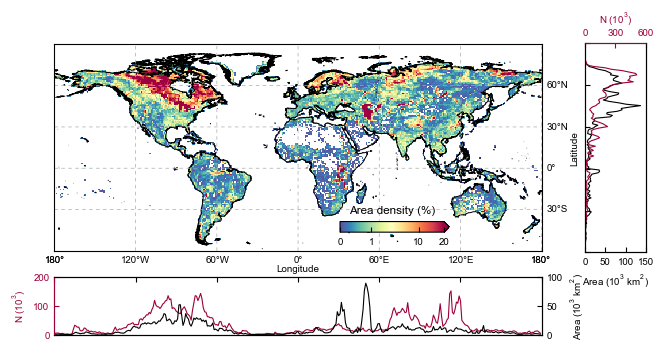

In [54]:
savepic=fig_path+'/global_grid_area_count.tif'
fig=plt.figure(figsize=(8.4,3.79))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[5,1.38],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[0, 0])
ax4=fig.add_axes([0.465,0.38,0.13,0.028])# [left, bottom, width, height]
RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)
legend_kwds={'orientation': "horizontal",'extend':'max', 'ticks': [0,1,10,20]}

add_background_fig(ax1,ax4,'Area density (%)',latlon_1degree_SJ_last_data,terrain_map,'hu_ap',legend_kwds,colors.PowerNorm(gamma=0.4,vmin=0.001, vmax=20))

ax2=plt.subplot(gs[0, 1],)
x_major_locator=MultipleLocator(50)#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(30)#把y轴的刻度间隔设置为10，并存在变量里
coordinateaxis=plt.gca()
# .invert_xaxis()#ax为两条坐标轴的实例
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
# plt.yticks([])
coordinateaxis.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为10的倍数
plt.xlim(0,150)
# plt.xticks(range(0,151,50))
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(-60,90)
plt.yticks(visible=False)
# index_ls = ['60°S°','30°S','0°','30°N','60°N','90°N']
# plt.yticks(range(-60,91,30), index_ls)
#把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
plt.plot(Lat_data['hu_a0'].values/1000, latitude, color='k', linestyle = "-",linewidth = 0.8)

plt.xlabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)',)
plt.ylabel('Latitude')

ax22 = ax2.twiny()
x_major_locator=MultipleLocator(100)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
plt.xlim(0,600)
plt.xticks(range(0,601,300))
maroonbar=plt.plot(Lat_data['hu_c0'].values/1000.0, latitude, color='#9e003a', linestyle = "-",linewidth = 0.8)

ax22.xaxis.label.set_color(maroonbar[0].get_color())
ax22.spines['top'].set_color('#9e003a')##a90308
ax22.tick_params(axis = 'x', colors = maroonbar[0].get_color())## 双Y轴刻度颜色设置
ax22.set_xlabel('N ($\mathregular{10^3}$)')

ax3=plt.subplot(gs[1,0])

plt.tick_params(bottom=False, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)

x_major_locator=MultipleLocator(60)
y_major_locator=MultipleLocator(25)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)
plt.ylim(0,200)
plt.yticks(range(0,201,100))
plt.xlim(-180,180)
ax3.tick_params(axis = 'y', colors = maroonbar[0].get_color())## 刻度值颜色设置
ax3.set_ylabel('N ($\mathregular{10^3}$)')
plt.plot(longitude,Lon_data['hu_c0'].values/1000.0, color='#9e003a', linestyle = "-",linewidth = 0.8)
ax3.spines['left'].set_color('#9e003a')
ax3.yaxis.label.set_color(maroonbar[0].get_color())
ax3.set_xlabel('Longitude')
ax3.xaxis.set_label_position("top")

x_major_locator=MultipleLocator(60)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)

ax33 = ax3.twinx()
plt.ylim(0,100)#刻度范围
plt.xlim(-180,180)
plt.plot(longitude,Lon_data['hu_a0'].values/1000, color='k', linestyle = "-",linewidth = 0.8)#
ax33.spines['left'].set_color('#9e003a')
ax33.set_ylabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)')

plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2534720208.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap('RdYlBu_r', 256)#


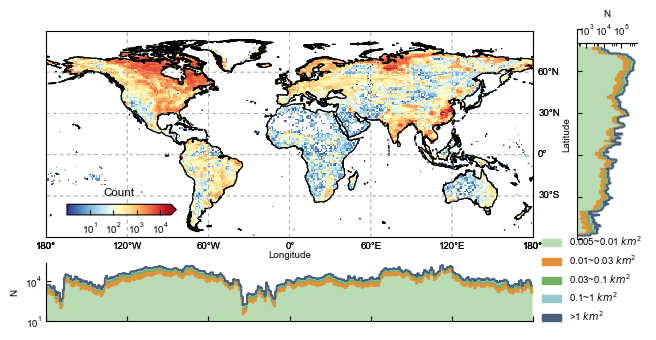

In [62]:
savepic=fig_path+'/count_log.tif'
fig=plt.figure(figsize=(8.4,3.79))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[5,1.38],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[0, 0])

RdYlBu_r = plt.cm.get_cmap('RdYlBu_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)
ax4=fig.add_axes([0.15,0.39,0.13,0.028])# [left, bottom, width, height]
legend_kwds={'orientation': "horizontal",'extend':'max','ticks': [10,100,1000,10000]}
norm=colors.LogNorm(vmin=1, vmax=30000)

add_background_fig(ax1,ax4,'Count',latlon_1degree_SJ_last_data,terrain_map,'hu_c0',legend_kwds,norm)

ax2=plt.subplot(gs[0, 1],)

x_major_locator=MultipleLocator(25)
y_major_locator=MultipleLocator(30)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)

ax2.set_xlim(300,800000)
ax2.set_xscale('log',base=10,subs=[3,4,5])#
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position('top')
ax2.spines['top'].set_position(('data', 80))
plt.ylim(-60,90)
plt.yticks(visible=False)
plt.xlabel('N')
plt.ylabel('Latitude')

#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
hu_c1=Lat_data['hu_c1'].values
hu_c3=Lat_data['hu_c3'].values
hu_c10=Lat_data['hu_c10'].values
hu_c100=Lat_data['hu_c100'].values
stack_data = np.vstack([hu_c1,hu_c3,hu_c10,hu_c100])
stack_totals = np.cumsum(stack_data, axis=0)
ax2.fill_betweenx(latitude, 0, stack_totals[0, :], color=color_list[0],step='pre')
ax2.fill_betweenx(latitude, stack_totals[0, :],stack_totals[1, :], color=color_list[1],step='pre')
ax2.fill_betweenx(latitude, stack_totals[1, :],stack_totals[2, :], color=color_list[2],step='pre')
ax2.fill_betweenx(latitude, stack_totals[2, :],stack_totals[3, :], color=color_list[3],step='pre')
ax2.fill_betweenx(latitude, stack_totals[3, :],Lat_data['hu_c0'].values, color=color_list[4],step='pre')


ax3=plt.subplot(gs[1,0])

plt.tick_params(bottom=True, top=False, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
ax3.set_ylim(10,200000)
ax3.set_yscale('log',base=10,subs=[2,3,4,5])#
x_major_locator=MultipleLocator(60)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
plt.xlim(-180,180)
hu_c1=Lon_data['hu_c1'].values
hu_c3=Lon_data['hu_c3'].values
hu_c10=Lon_data['hu_c10'].values
hu_c100=Lon_data['hu_c100'].values
stack_data = np.vstack([hu_c1,hu_c3,hu_c10,hu_c100])
stack_totals = np.cumsum(stack_data, axis=0)
ax3.fill_between(longitude, 0, stack_totals[0, :], color=color_list[0],step='pre',label=label_list[0])
ax3.fill_between(longitude, stack_totals[0, :],stack_totals[1, :], color=color_list[1],step='pre',label=label_list[1])
ax3.fill_between(longitude, stack_totals[1, :],stack_totals[2, :], color=color_list[2],step='pre',label=label_list[2])
ax3.fill_between(longitude, stack_totals[2, :],stack_totals[3, :], color=color_list[3],step='pre',label=label_list[3])
ax3.fill_between(longitude, stack_totals[3, :],Lon_data['hu_c0'].values, color=color_list[4],step='pre',label=label_list[4])
# plt.fill_between(lon_1,pic_1,color='grey',alpha=0.4)
ax3.set_ylabel('N')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel('Longitude')
ax3.xaxis.set_label_position("top")
plt.legend(bbox_to_anchor=(1.01, -0.1), loc='lower left', borderaxespad=0,frameon=False)
# plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

In [ ]:
print(Lat_data['hu_c0'].values.max())
print(Lat_data['hu_c0'].values.min())

In [ ]:
print(Lon_data['hu_c0'].values.max())
print(Lon_data['hu_c0'].values.min())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2715490928.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap('RdYlBu_r', 256)#
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2715490928.py:48: RuntimeWarning: invalid value encountered in true_divide
  hu_c1_p=Lat_data['hu_c1'].values/Lat_data['hu_c0'].values*100
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2715490928.py:49: RuntimeWarning: invalid value encountered in true_divide
  hu_c3_p=Lat_data['hu_c3'].values/Lat_data['hu_c0'].values*100
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2715490928.py:50: RuntimeWarning: invalid value encountered in true_divide
  hu_c10_p=Lat_data['hu_c10'].values/Lat_data['hu_c0'].values*100
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\2715490928.py:51: RuntimeWarning: invalid va

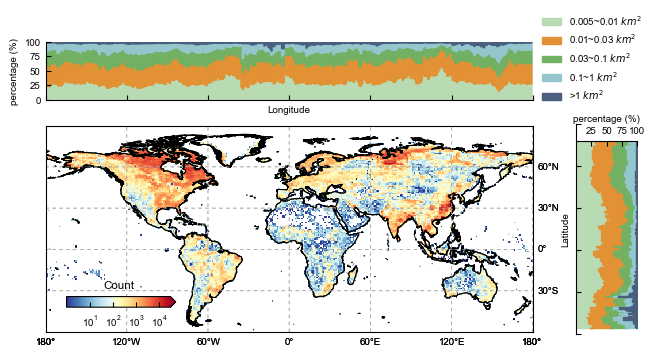

In [63]:
savepic=fig_path+'/count_southsea_island_percentage.tif'
fig=plt.figure(figsize=(8.4,3.79))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[1.38,5],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[1, 0])
RdYlBu_r = plt.cm.get_cmap('RdYlBu_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
# white = np.array([255/256, 255/256, 255/256,1])
# newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)

ax4=fig.add_axes([0.15,0.18,0.13,0.028])
legend_kwds={'orientation': "horizontal",'extend':'max','ticks': [10,100,1000,10000]}
norm=colors.LogNorm(vmin=1, vmax=30000)

add_background_fig(ax1,ax4,'Count',latlon_1degree_SJ_last_data,terrain_map,'hu_c0',legend_kwds,norm)


ax2=plt.subplot(gs[1, 1],)
x_major_locator=MultipleLocator(25)
y_major_locator=MultipleLocator(30)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)

plt.xlim(0,100)
plt.xticks(range(25,101,25))
plt.ylim(-60,90)
plt.yticks(visible=False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position('top')
ax2.spines['top'].set_position(('data', 78))
# plt.xlabel('N ($\mathregular{10^3}$)')
plt.xlabel('percentage (%)')
plt.ylabel('Latitude')

#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
hu_c1_p=Lat_data['hu_c1'].values/Lat_data['hu_c0'].values*100
hu_c3_p=Lat_data['hu_c3'].values/Lat_data['hu_c0'].values*100
hu_c10_p=Lat_data['hu_c10'].values/Lat_data['hu_c0'].values*100
hu_c100_p=Lat_data['hu_c100'].values/Lat_data['hu_c0'].values*100
stack_data = np.vstack([hu_c1_p,hu_c3_p,hu_c10_p,hu_c100_p])
stack_totals = np.cumsum(stack_data, axis=0)
ax2.fill_betweenx(latitude, 0, stack_totals[0, :], color=color_list[0],step='pre')
ax2.fill_betweenx(latitude, stack_totals[0, :],stack_totals[1, :], color=color_list[1],step='pre')
ax2.fill_betweenx(latitude, stack_totals[1, :],stack_totals[2, :], color=color_list[2],step='pre')
ax2.fill_betweenx(latitude, stack_totals[2, :],stack_totals[3, :],color=color_list[3],step='pre')
ax2.fill_betweenx(latitude, stack_totals[3, :],100, color=color_list[4],step='pre')

ax3=plt.subplot(gs[0,0])

x_major_locator=MultipleLocator(60)
y_major_locator=MultipleLocator(25)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)

plt.tick_params(bottom=True, top=False, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
# plt.ylim(30,200000)
plt.ylim(0,100)
plt.yticks(range(0,101,25))
# plt.ylim(0,np.max(pia_gte5)+5)#刻度范围
# plt.yscale('log')#
# ax3.yaxis.set_major_formatter(LogFormatter(base=10))
# ax3.set_yticks([100,1000,10000,100000])
# ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.xlim(-180,180)
hu_c1_p=Lon_data['hu_c1'].values/Lon_data['hu_c0'].values*100
hu_c3_p=Lon_data['hu_c3'].values/Lon_data['hu_c0'].values*100
hu_c10_p=Lon_data['hu_c10'].values/Lon_data['hu_c0'].values*100
hu_c100_p=Lon_data['hu_c100'].values/Lon_data['hu_c0'].values*100
stack_data = np.vstack([hu_c1_p,hu_c3_p,hu_c10_p,hu_c100_p])
stack_totals = np.cumsum(stack_data, axis=0)
# ax3.stackplot(longitude,[hu_c1,hu_c3,hu_c100],labels=['hu_c1', 'hu_c3','hu_c100'])
# plt.fill_between(lon_1,pic_1,color='grey',alpha=0.4)
ax3.fill_between(longitude, 0, stack_totals[0, :], color=color_list[0],step='pre',label=label_list[0])
ax3.fill_between(longitude, stack_totals[0, :],stack_totals[1, :], color=color_list[1],step='pre',label=label_list[1])
ax3.fill_between(longitude, stack_totals[1, :],stack_totals[2, :], color=color_list[2],step='pre',label=label_list[2])
ax3.fill_between(longitude, stack_totals[2, :],stack_totals[3, :], color=color_list[3],step='pre',label=label_list[3])
ax3.fill_between(longitude, stack_totals[3, :],100, color=color_list[4],step='pre',label=label_list[4])
# ax3.set_ylabel('N ($\mathregular{10^3}$)')
ax3.set_ylabel('percentage (%)')
ax3.set_xlabel('Longitude')
ax3.xaxis.set_label_position("bottom")
plt.legend(bbox_to_anchor=(1.01, -0.1), loc='lower left', borderaxespad=0,frameon=False)
# plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\414172420.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24024\414172420.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#


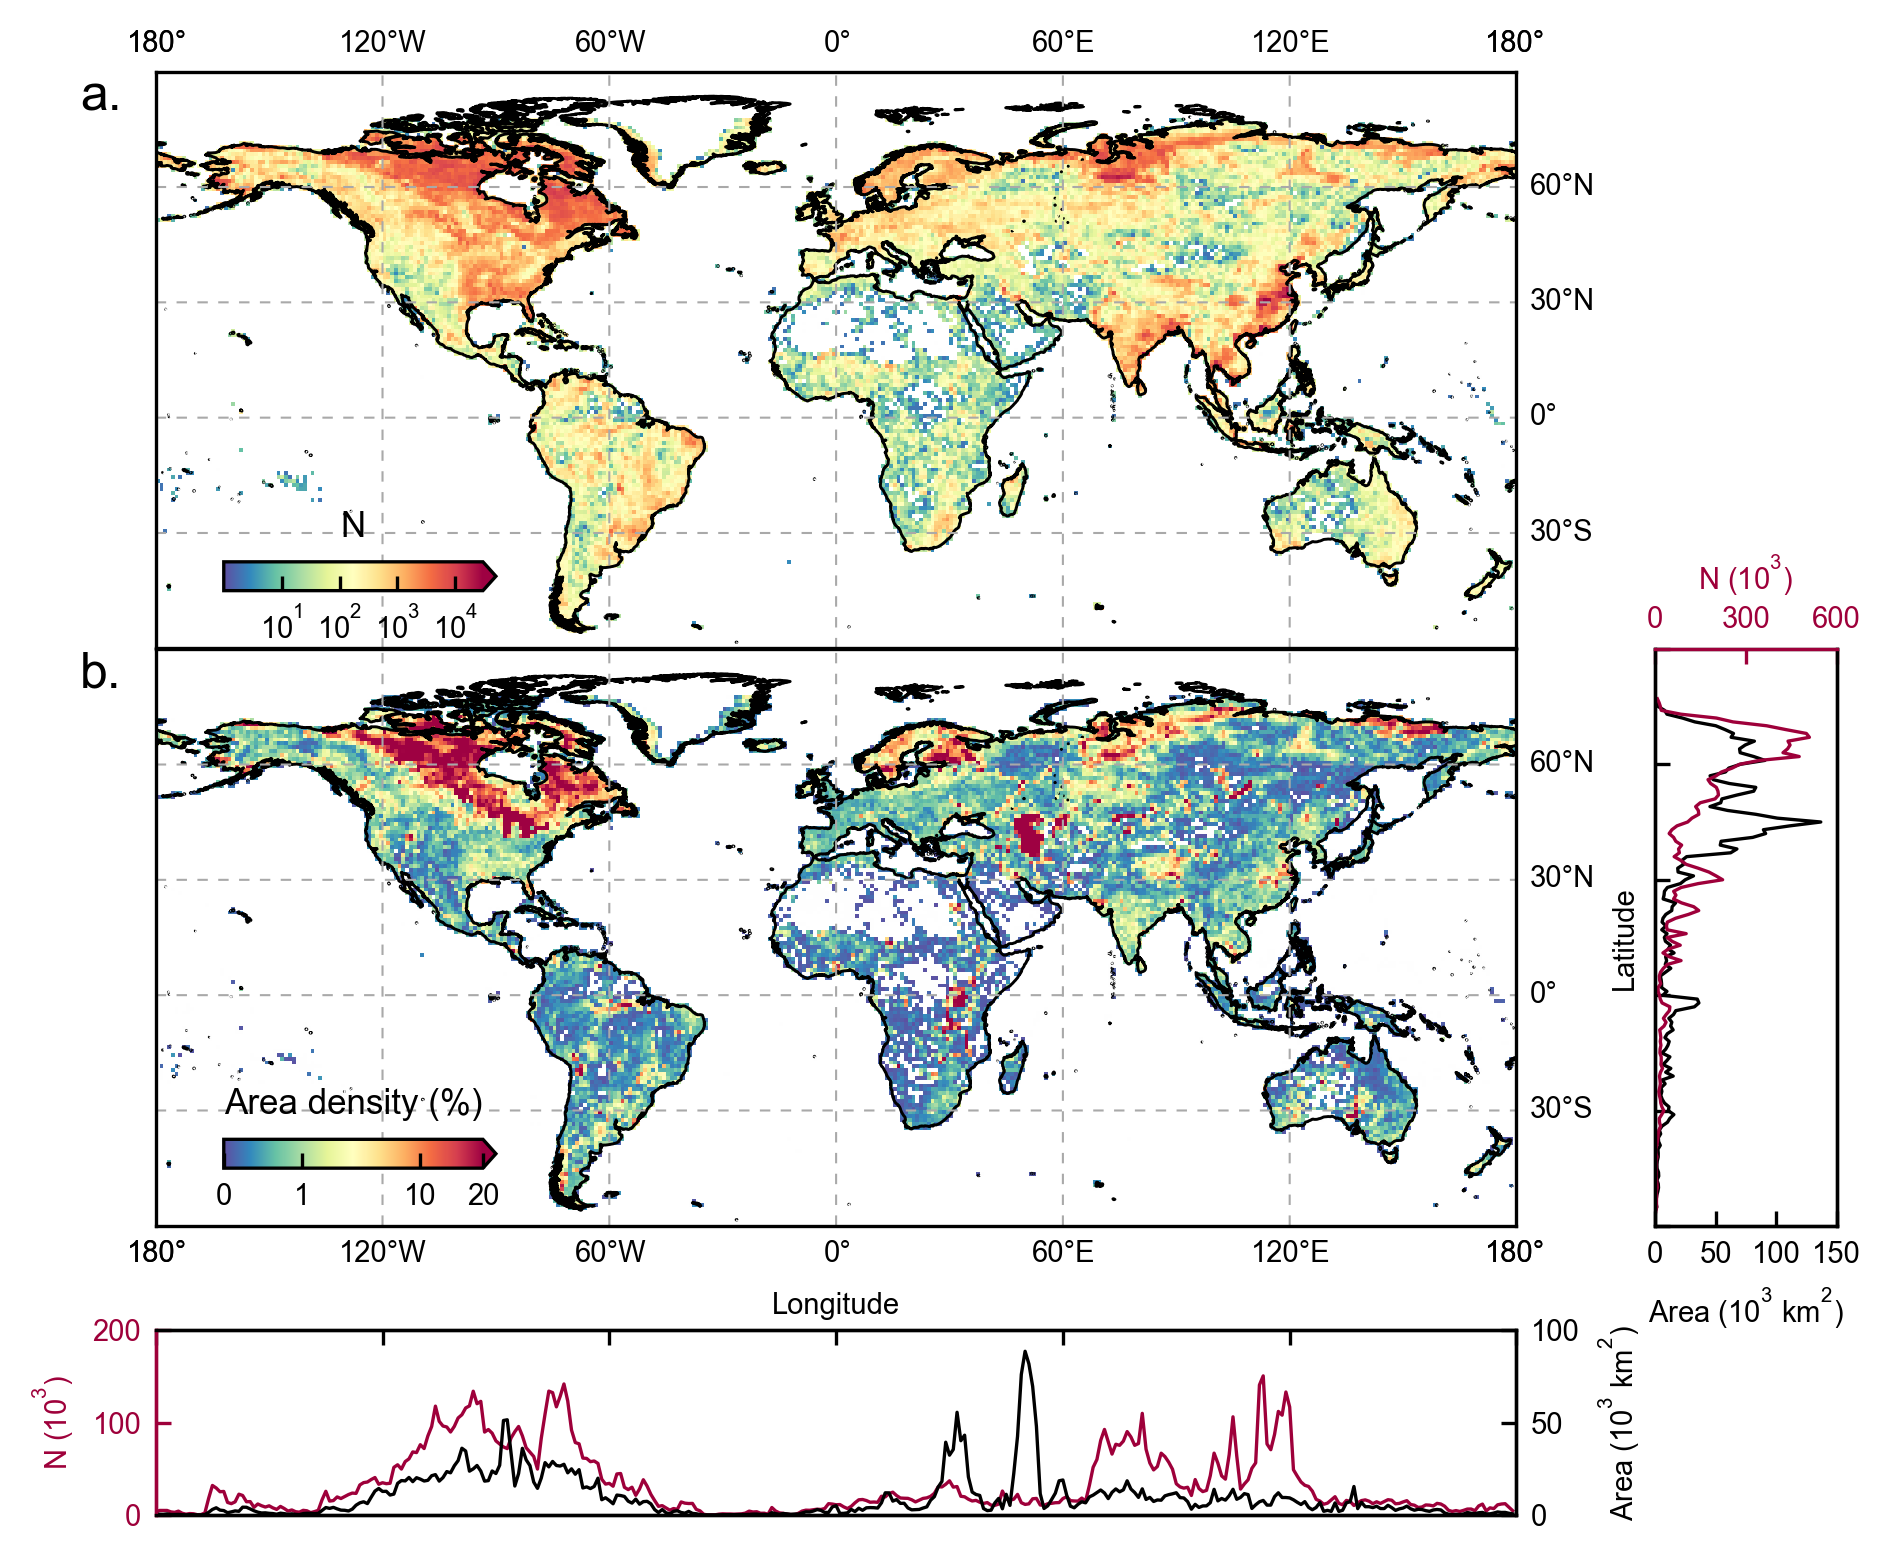

In [81]:
savepic=os.path.join(fig_path,'5_global_grid_area_count.png')
fig=plt.figure(figsize=(7.23,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,2,width_ratios=[6,0.8],height_ratios=[2.5,2.5,0.45,0.8],wspace =0.18,hspace =0)

columns=['hu_c0','hu_ap']
norms=[colors.LogNorm(vmin=1, vmax=30000),colors.PowerNorm(gamma=0.4,vmin=0.001, vmax=20)]
ticks=[[10,100,1000,10000],[0,1,10,20]]
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['N','Area density (%)']

for k in [0,1]:
    ax=plt.subplot(gs[k, 0])
    RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#
    newcolors = RdYlBu_r(np.linspace(0,1, 256))
    white = np.array([255/256, 255/256, 255/256,1])
    newcolors[:1, :] = white
    terrain_map = ListedColormap(newcolors)
    axins = ax.inset_axes((0.05, 0.1,0.2,0.05)) 
    legend_kwds={'orientation': "horizontal",'extend':'max','ticks': ticks[k]}
    add_background_fig(ax,axins,titles[k],latlon_1degree_SJ_last_data,terrain_map,columns[k],legend_kwds,norms[k])
    ax.text(-200,80,sub_fig_name[k],fontsize=12)

ax2=plt.subplot(gs[1, 1],)
x_major_locator=MultipleLocator(50)#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(30)#把y轴的刻度间隔设置为10，并存在变量里
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
coordinateaxis.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为10的倍数
plt.xlim(0,150)
plt.ylim(-60,90)
plt.yticks(visible=False)
plt.plot(Lat_data['hu_a0'].values/1000, latitude, color='k', linestyle = "-",linewidth = 0.8)
plt.xlabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)',)
plt.ylabel('Latitude')

ax22 = ax2.twiny()
x_major_locator=MultipleLocator(100)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
plt.xlim(0,600)
plt.xticks(range(0,601,300))
maroonbar=plt.plot(Lat_data['hu_c0'].values/1000.0, latitude, color='#9e003a', linestyle = "-",linewidth = 0.8)

ax22.xaxis.label.set_color(maroonbar[0].get_color())
ax22.spines['top'].set_color('#9e003a')##a90308
ax22.tick_params(axis = 'x', colors = maroonbar[0].get_color())## 双Y轴刻度颜色设置
ax22.set_xlabel('N ($\mathregular{10^3}$)')

ax3=plt.subplot(gs[3,0])
plt.tick_params(bottom=False, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)

x_major_locator=MultipleLocator(60)
y_major_locator=MultipleLocator(25)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)
plt.ylim(0,200)
plt.yticks(range(0,201,100))
plt.xlim(-180,180)
ax3.tick_params(axis = 'y', colors = maroonbar[0].get_color())## 刻度值颜色设置
ax3.set_ylabel('N ($\mathregular{10^3}$)')
plt.plot(longitude,Lon_data['hu_c0'].values/1000.0, color='#9e003a', linestyle = "-",linewidth = 0.8)
ax3.spines['left'].set_color('#9e003a')
ax3.yaxis.label.set_color(maroonbar[0].get_color())
ax3.set_xlabel('Longitude')
ax3.xaxis.set_label_position("top")

x_major_locator=MultipleLocator(60)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)

ax33 = ax3.twinx()
ax33.set_ylim(0,100)#刻度范围
ax33.set_xlim(-180,180)
plt.plot(longitude,Lon_data['hu_a0'].values/1000, color='k', linestyle = "-",linewidth = 0.8)#
ax33.spines['left'].set_color('#9e003a')
ax33.set_ylabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)')
# plt.tight_layout()
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()


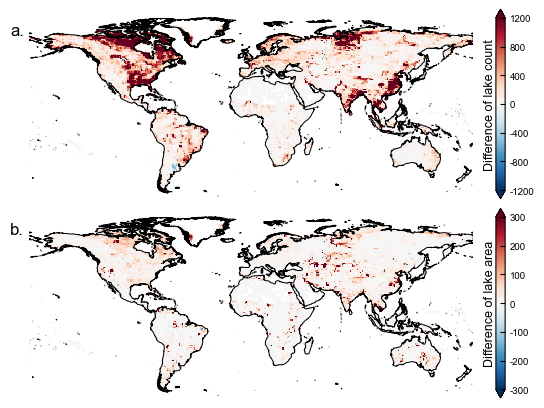

In [106]:
savepic=os.path.join(fig_path,'6_compare_with_PLD.tif')
columns=['diff_c0','diff_a0']
norms=[colors.Normalize(vmin=-1200, vmax=1200),colors.Normalize(vmin=-300, vmax=300)]
ticks=[np.arange(-1200,1201,400),np.arange(-300,301,100)]
titles=['Difference of lake count','Difference of lake area']

fig=plt.figure(figsize=(6.15,5.05))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,2,width_ratios=[12,0.25],height_ratios=[1,1],wspace =0.1,hspace =0.05)
for k in [0,1]:
    ax=plt.subplot(gs[k, 0])
    axins=plt.subplot(gs[k,1])# [left, bottom, width, height]
    for spine in ax.spines.values():
        spine.set_visible(False)
    RdYlBu_r = plt.colormaps.get_cmap('RdBu_r')#
    newcolors = RdYlBu_r(np.linspace(0,1, 256))
    terrain_map = ListedColormap(newcolors)
    legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[k]}
    norm=colors.Normalize(vmin=-1000, vmax=1000)
    add_background_fig(ax,axins,'',latlon_1degree_SJ_last_data,terrain_map,columns[k],legend_kwds,norms[k],False)
    ax.text(-195,70,sub_fig_name[k],fontsize=12)
    axins.text(-0,0, titles[k],rotation=90,ha='right',va='center',fontsize=9)
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

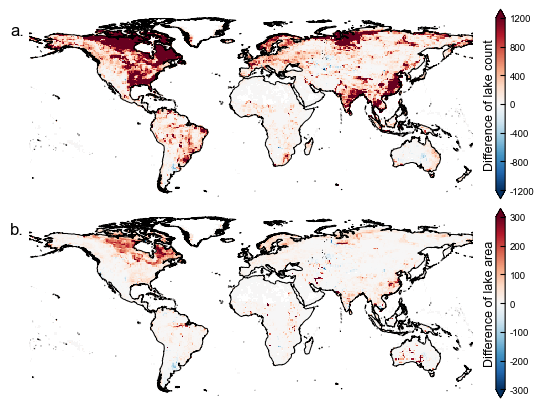

In [105]:
savepic=fig_path+'/6_compare_with_GLAKES.tif'
columns=['diff_G_c0','diff_G_a0']
norms=[colors.Normalize(vmin=-1200, vmax=1200),colors.Normalize(vmin=-300, vmax=300)]
ticks=[np.arange(-1200,1201,400),np.arange(-300,301,100)]
titles=['Difference of lake count','Difference of lake area']

fig=plt.figure(figsize=(6.15,5.05))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,2,width_ratios=[12,0.25],height_ratios=[1,1],wspace =0.1,hspace =0.05)
for k in [0,1]:
    ax=plt.subplot(gs[k, 0])
    axins=plt.subplot(gs[k,1])# [left, bottom, width, height]
    for spine in ax.spines.values():
        spine.set_visible(False)
    RdYlBu_r = plt.colormaps.get_cmap('RdBu_r')#
    newcolors = RdYlBu_r(np.linspace(0,1, 256))
    terrain_map = ListedColormap(newcolors)
    legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[k]}
    norm=colors.Normalize(vmin=-1000, vmax=1000)
    add_background_fig(ax,axins,'',latlon_1degree_SJ_last_data,terrain_map,columns[k],legend_kwds,norms[k],False)
    ax.text(-195,70,sub_fig_name[k],fontsize=12)
    axins.text(0,0, titles[k],rotation=90,ha='right',va='center',fontsize=9)
    
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

## PLD

In [ ]:
fig=plt.figure(figsize=(8.4,3.79))

ax1=plt.gca()
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)

RdYlBu_r = plt.cm.get_cmap('RdYlGn_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
# newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)

ax4=fig.add_axes([0.92,0.12,0.015,0.7])# [left, bottom, width, height]
latlon_1degree_SJ_last=path+'/global_grid.shp'
gdb=r'J:\lakemapping\postprocess\v12_240905_backup\7_analysis.gdb'
latlon_1degree_SJ_last_data = gp.read_file(gdb,layer='global_grid_spatial_hu_pld_2')
c = 'diff_c_0'
# tick = [0,10,100,1000,10000]
# color = colors.LogNorm(vmin=1, vmax=30000)

# c = 'hu_c_lt_1ha'#'diff_c_0'
# tick = [0,10,100,1000,10000]
# color = colors.LogNorm(vmin=1, vmax=30000)

# c = 'diff_c_bt_1_3ha'
tick = [-1000,-500,0,500,1000]
color = colors.Normalize(vmin=-1000, vmax=1000)

# c = 'diff_c_bt_3_10ha'
# tick = [-300,-150,0,150,300]
# color = colors.Normalize(vmin=-300, vmax=300)

# c = 'diff_c_bt_10_100ha'
# tick = [-150,-100,-50,0,50,100,150]
# color = colors.Normalize(vmin=-150, vmax=150)

# c = 'diff_a_0'
# tick = [-500,-250,0,250,500]
# color = colors.Normalize(vmin=-500, vmax=500)

tu=latlon_1degree_SJ_last_data.plot(
        ax=ax1,
        cax=ax4,
        zorder=1,
        legend=True,  # 图例
        column=c,  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "vertical",
                     'extend':'both',
                     'ticks': tick ,
#                      'title':'difference of lake count between 1~3 ha',
#                      'bbox_to_anchor': (1, 1),
#                      'aspect': 40,  
                     },
        norm=color
        )
ax1.text(215,-60,'difference of lake count',rotation=90,fontsize=10)#'lake count lt 1 ha''difference of lake count between 10~100 ha'

# ax1.text(63,-35, 'Relative contributions of small lakes')
savepic=path+f'/result/PLD_{c}.tif'
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

In [ ]:
global_diss

In [ ]:
Arid_data=gp.read_file(gdb,layer='d_lakes_in_arid_grids_Count_Area')
Arid_data

In [ ]:
savepic=fig_path+'/Arid_region.tif'
fig=plt.figure(figsize=(8.4,3.79))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[5,1.38],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[0, 0])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)#创建basemap对象

#Fill the globe with a blue color
# map1.drawmapboundary(fill_color='gainsboro')
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)#color='k',fill_color='grey',
# south_island = r'J:\b02_Dataset\shp\SouthSea/bou2_4l_dis.shp'
# map1.readshapefile(south_island[:-4],'south_island',drawbounds=True,color='k',linewidth=0.7)
map1.readshapefile(Arid_Region[:-4],'Arid_Region',drawbounds=True,color='k',linewidth=0.1)

map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线


RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)

ax4=fig.add_axes([0.465,0.38,0.13,0.028])# [left, bottom, width, height]
tu=Arid_data.plot(
        ax=ax1,
        cax=ax4,
        zorder=1,
        legend=True,  # 图例
        column='hu_ap',  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "horizontal",
                     'extend':'max',
                     'ticks': [0,1,10,20]
                     },
        norm=colors.PowerNorm(gamma=0.4,vmin=0.001, vmax=20)
        )

ax1.text(43,-35, 'Area density (%)')
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

In [ ]:
savepic=fig_path+'/d_compare_with_PLD.tif'
fig=plt.figure(figsize=(6.05,5))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,2,width_ratios=[12,0.25],height_ratios=[1,1],wspace =0.05,hspace =0.05)
ax1=plt.subplot(gs[0,0])
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)#创建basemap对象
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)

RdYlBu_r = plt.cm.get_cmap('RdBu_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
terrain_map = ListedColormap(newcolors)
ax4=plt.subplot(gs[0,1])# [left, bottom, width, height]
tu=Arid_data.plot(
        ax=ax1,
        cax=ax4,
        zorder=1,
        legend=True,  # 图例
        column='diff_c_gt1',  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "vertical",
                     'extend':'both',
                     'ticks': np.arange(-600,601,200)
                     },
        norm=colors.Normalize(vmin=-600, vmax=600)
        )

ax4.text(-2000,-450, 'difference of lake count (>1 ha)',rotation=90,fontsize=8)

ax2=plt.subplot(gs[1,0],)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax5=plt.subplot(gs[1,1])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax2)#创建basemap对象
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)

tu=Arid_data.plot(
        ax=ax2,
        cax=ax5,
        zorder=1,
        legend=True,  # 图例
        column='diff_a0',  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "vertical",
                     'extend':'both',
                     'ticks': np.arange(-300,301,100)
                     },
        norm=colors.Normalize(vmin=-300, vmax=300)
        )

ax5.text(-1000,-175, 'difference of lake area',rotation=90,fontsize=8)
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

## 各大洲玫瑰图

In [ ]:
# 读取 Excel 文件
file_path = 'path_to_your_file.xlsx'  # 替换为您的 Excel 文件路径
sheets = pd.ExcelFile(file_path).sheet_names

# 创建一个子图
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8.4, 8.4), subplot_kw=dict(polar=True))


# 遍历每个大洲的 sheet
for i, sheet in enumerate(sheets):
    # 读取每个 sheet 的数据
    file_path=os.path.join(excel_dir,f'c{i+1}_{continent}_polygon_afm_mwBL_BG_Summary.csv')
    data = pd.read_csv(file_path)

    # 假设数据框中有“湖泊尺寸”和“数量”列
    sizes = data['lake_area']
    counts = data['count']

    # 计算角度
    angles = np.linspace(0, 2 * np.pi, len(sizes), endpoint=False).tolist()
    counts = counts.tolist()

    # 为了绘制闭合图形，添加第一项到末尾
    counts += counts[:1]
    angles += angles[:1]

    # 创建玫瑰图
    axs[i].fill(angles, counts, alpha=0.25)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(sizes, fontsize=10)
    axs[i].set_title(sheet, size=15)

# 调整布局
plt.tight_layout()
plt.show()


In [ ]:
GLAKES_new_gdb=r'E:\data_for_pi_241223\GLAKES_new.gdb'
GLAKES_latlon_1degree_SJ_last_data=gp.read_file(GLAKES_new_gdb,layer='Global_grid_shp_1degree_GLAKES_Count_Area')
GLAKES_latlon_1degree_SJ_last_data

In [ ]:
GLAKES_Lat_data = GLAKES_latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= GLAKES_Lat_data['Lat_down'].values
GLAKES_Lat_data

In [ ]:
GLAKES_Lon_data = GLAKES_latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= GLAKES_Lon_data['Lon_left'].values
GLAKES_Lon_data

In [ ]:
savepic=fig_path+'/GLAKES_count_log.tif'
fig=plt.figure(figsize=(8.4,3.79))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[5,1.38],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[0, 0])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)#创建basemap对象

map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)#color='k',fill_color='grey',
# south_island = r'J:\b02_Dataset\shp\SouthSea/bou2_4l_dis.shp'
# map1.readshapefile(south_island[:-4],'south_island',drawbounds=True,color='k',linewidth=0.7)

map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

RdYlBu_r = plt.cm.get_cmap('RdYlBu_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
# newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)

ax4=fig.add_axes([0.15,0.39,0.13,0.028])# [left, bottom, width, height]
tu=GLAKES_latlon_1degree_SJ_last_data.plot(ax=ax1,cax=ax4,zorder=1,legend=True,column='GL_c0',  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "horizontal",
                     'extend':'max',
                     'ticks': [10,100,1000]
                     },
        norm=colors.LogNorm(vmin=5, vmax=2750)
        )

ax1.text(-65,-35, 'N')

ax2=plt.subplot(gs[0, 1],)

x_major_locator=MultipleLocator(25)
y_major_locator=MultipleLocator(30)
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)
coordinateaxis.yaxis.set_major_locator(y_major_locator)

plt.xlim(0,200)
plt.xticks(range(0,201,100))
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(-60,90)
plt.yticks(visible=False)

ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position('top')
ax2.spines['top'].set_position(('data', 80))
plt.ylim(-60,90)
plt.yticks(visible=False)
plt.xlabel('N ($\mathregular{10^3}$)')
plt.ylabel('Latitude')

pic_0=GLAKES_Lat_data['GL_c0']/1000.0
plt.plot(pic_0, latitude, color='k', linestyle = "-",linewidth = 0.8)


ax3=plt.subplot(gs[1,0])
pic_0=GLAKES_Lon_data['GL_c0']/1000.0

plt.tick_params(bottom=False, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
# lon=lonEW.col_values(0)#x

x_major_locator=MultipleLocator(60)#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(25)#把y轴的刻度间隔设置为10，并存在变量里
coordinateaxis=plt.gca()#ax为两条坐标轴的实例
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
coordinateaxis.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为10的倍数
plt.ylim(0,50)
plt.yticks(range(0,51,25))
plt.xlim(-180,180)
plt.plot(longitude,pic_0, color='k', linestyle = "-",linewidth = 0.8)
ax3.set_xlabel('Longitude',)
ax3.xaxis.set_label_position("top")

plt.ylabel('N ($\mathregular{10^3}$)')
plt.savefig(savepic,dpi=400)#,dpi=400
plt.show()

In [ ]:
savepic=fig_path+'/GLAKES_area_log.tif'
fig=plt.figure(figsize=(8.4,3.79))
gs = gridspec.GridSpec(2,3,width_ratios=[12,1.5,0.4],height_ratios=[5,1.38],wspace =0.23,hspace =0.18)
ax1=plt.subplot(gs[0, 0])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)#创建basemap对象
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.7)#color='k',fill_color='grey',

map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

RdYlBu_r = plt.cm.get_cmap('Spectral_r', 256)#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
white = np.array([255/256, 255/256, 255/256,1])
newcolors[:1, :] = white
terrain_map = ListedColormap(newcolors)

ax4=fig.add_axes([0.465,0.38,0.13,0.028])
tu=GLAKES_latlon_1degree_SJ_last_data.plot(
        ax=ax1,
        cax=ax4,
        zorder=1,
        legend=True,  # 图例
        column='GL_ap',  # 分级设色字段#picover0\pia_0
        cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
        legend_kwds={
                     'orientation': "horizontal",
                     'extend':'max',
                     'ticks': [0,1,10,20],
                     },
        norm=colors.PowerNorm(gamma=0.4,vmin=0.001, vmax=20),
        )

ax1.text(43,-35, 'Area density (%)')

ax2=plt.subplot(gs[0, 1],)
pia_0=GLAKES_Lat_data['GL_a0']/1000.0

x_major_locator=MultipleLocator(50)#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(30)#把y轴的刻度间隔设置为10，并存在变量里
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
coordinateaxis.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为10的倍数
plt.xlim(0,150)
plt.ylim(-60,90)
plt.yticks(visible=False)
#把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
plt.plot(pia_0, latitude, color='k', linestyle = "-",linewidth = 0.8)

plt.xlabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)',)
plt.ylabel('Latitude')

ax22 = ax2.twiny()
pic_0=GLAKES_Lat_data['GL_c0']/1000.0
x_major_locator=MultipleLocator(100)#把x轴的刻度间隔设置为1，并存在变量里
coordinateaxis=plt.gca()
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
plt.xlim(0,200)
plt.xticks(range(0,201,100))
maroonbar=plt.plot(pic_0, latitude, color='#9e003a', linestyle = "-",linewidth = 0.8)

ax22.xaxis.label.set_color(maroonbar[0].get_color())
ax22.spines['top'].set_color('#9e003a')##a90308
ax22.tick_params(axis = 'x', colors = maroonbar[0].get_color())## 双Y轴刻度颜色设置
ax22.set_xlabel('N ($\mathregular{10^3}$)')

ax3=plt.subplot(gs[1,0])

plt.tick_params(bottom=False, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)

x_major_locator=MultipleLocator(60)#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(25)#把y轴的刻度间隔设置为10，并存在变量里
coordinateaxis=plt.gca()#ax为两条坐标轴的实例
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
coordinateaxis.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为10的倍数
plt.ylim(0,50)
plt.yticks(range(0,51,25))
plt.xlim(-180,180)

pic_0=GLAKES_Lon_data['GL_c0']/1000.0
maroonbar=plt.plot(longitude,pic_0, color='#9e003a', linestyle = "-",linewidth = 0.8)#
ax3.yaxis.label.set_color(maroonbar[0].get_color())#坐标名颜色
ax3.tick_params(axis = 'y', colors = maroonbar[0].get_color())## 刻度值颜色设置
ax3.set_ylabel('N ($\mathregular{10^3}$)')

ax3.set_xlabel('Longitude',)
ax3.xaxis.set_label_position("top")

ax33 = ax3.twinx()

x_major_locator=MultipleLocator(60)#把x轴的刻度间隔设置为1，并存在变量里
coordinateaxis=plt.gca()#ax为两条坐标轴的实例
coordinateaxis.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数

plt.ylim(0,100)#刻度范围
plt.xlim(-180,180)

pia_0=GLAKES_Lon_data['GL_a0']/1000.0
plt.plot(longitude,pia_0, color='k', linestyle = "-",linewidth = 0.8)#
ax33.spines['left'].set_color('#9e003a')
ax33.set_ylabel('Area ($\mathregular{10^3}$ $\mathregular{km^2}$)')

plt.savefig(savepic,format="eps")#,dpi=400
plt.show()